In [1]:
# %matplotlib widget
import matplotlib as mpl

# mpl.rc('figure' dpi=300)
mpl.rc('image', interpolation='none')
mpl.rc('savefig', dpi=300, transparent=True, bbox='tight')

# Set the rendering backend.
# mpl.use('qt5agg')

# TODO: Verify if this is still needed?
# %config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

In [42]:
def crop_image(image):
    return image[200:1000, 500:1500]

rgb_dir = Path('/root/data/examples/RGB')
images = [crop_image(plt.imread(str(file))) for file in rgb_dir.iterdir()]

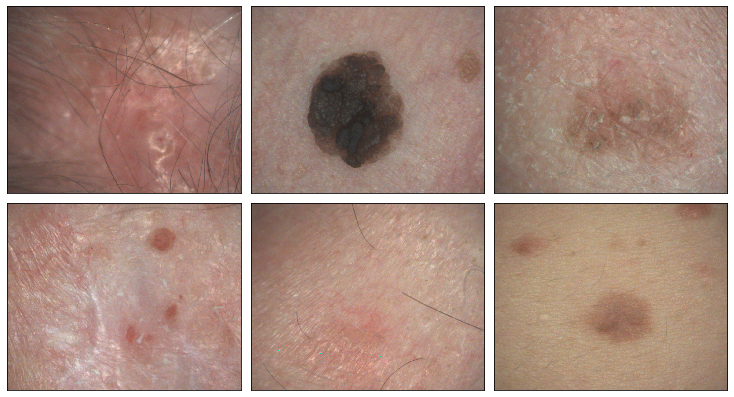

In [51]:
fig = plt.figure(figsize=(10, 5.33))
axes = fig.subplots(ncols=3, nrows=2)

for i, image in enumerate(images):
    ax = axes.flat[i]
    ax.imshow(image, )
#     ax.set_axis_off()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

# fig.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout(h_pad=1, w_pad=1, pad=0)

fig.savefig('fig7.pdf')
fig.show()

In [14]:
?plt.imshow